In [2]:
## Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.ticker as mtick
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
aug_train = pd.read_csv('aug_train.csv')
display(aug_train.head())
print(aug_train.shape)

ProfileReport(aug_train, minimal=False).to_file(output_file="output_min.html")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


(19158, 14)


In [4]:
# Add orders to our variables for the sake of visualization
# Orders

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['no_enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
#exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']


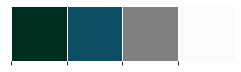

In [5]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

In [14]:
train = pd.DataFrame(aug_train["gender"].value_counts(dropna=False))
train.index = train.index.fillna('Not provided')
train["Percentage"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
train

,gender,Percentage
Male,13221,69.010335
Not provided,4508,23.530640
Female,1238,6.462052
Other,191,0.996973


# Visualizing Categorical Variables with low cardinality

In [42]:
aug_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [45]:
aug_train.select_dtypes(include=['object']).columns.tolist()

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [50]:
aug_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [51]:
aug_train.columns[aug_train.nunique()<=5].tolist()

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'target']

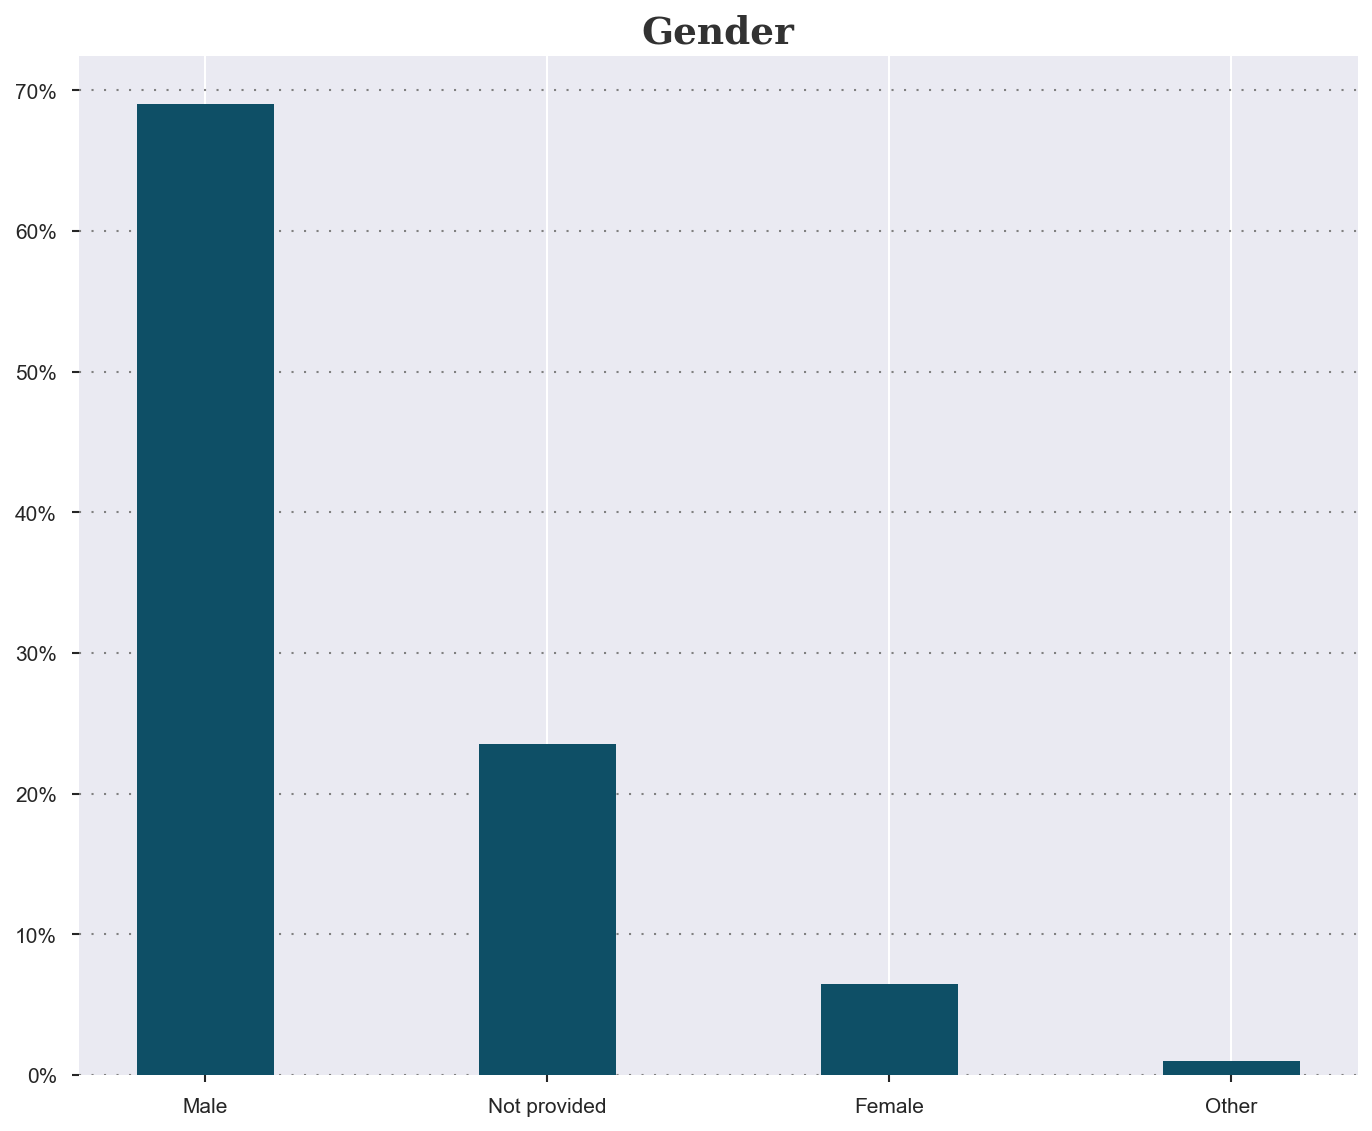

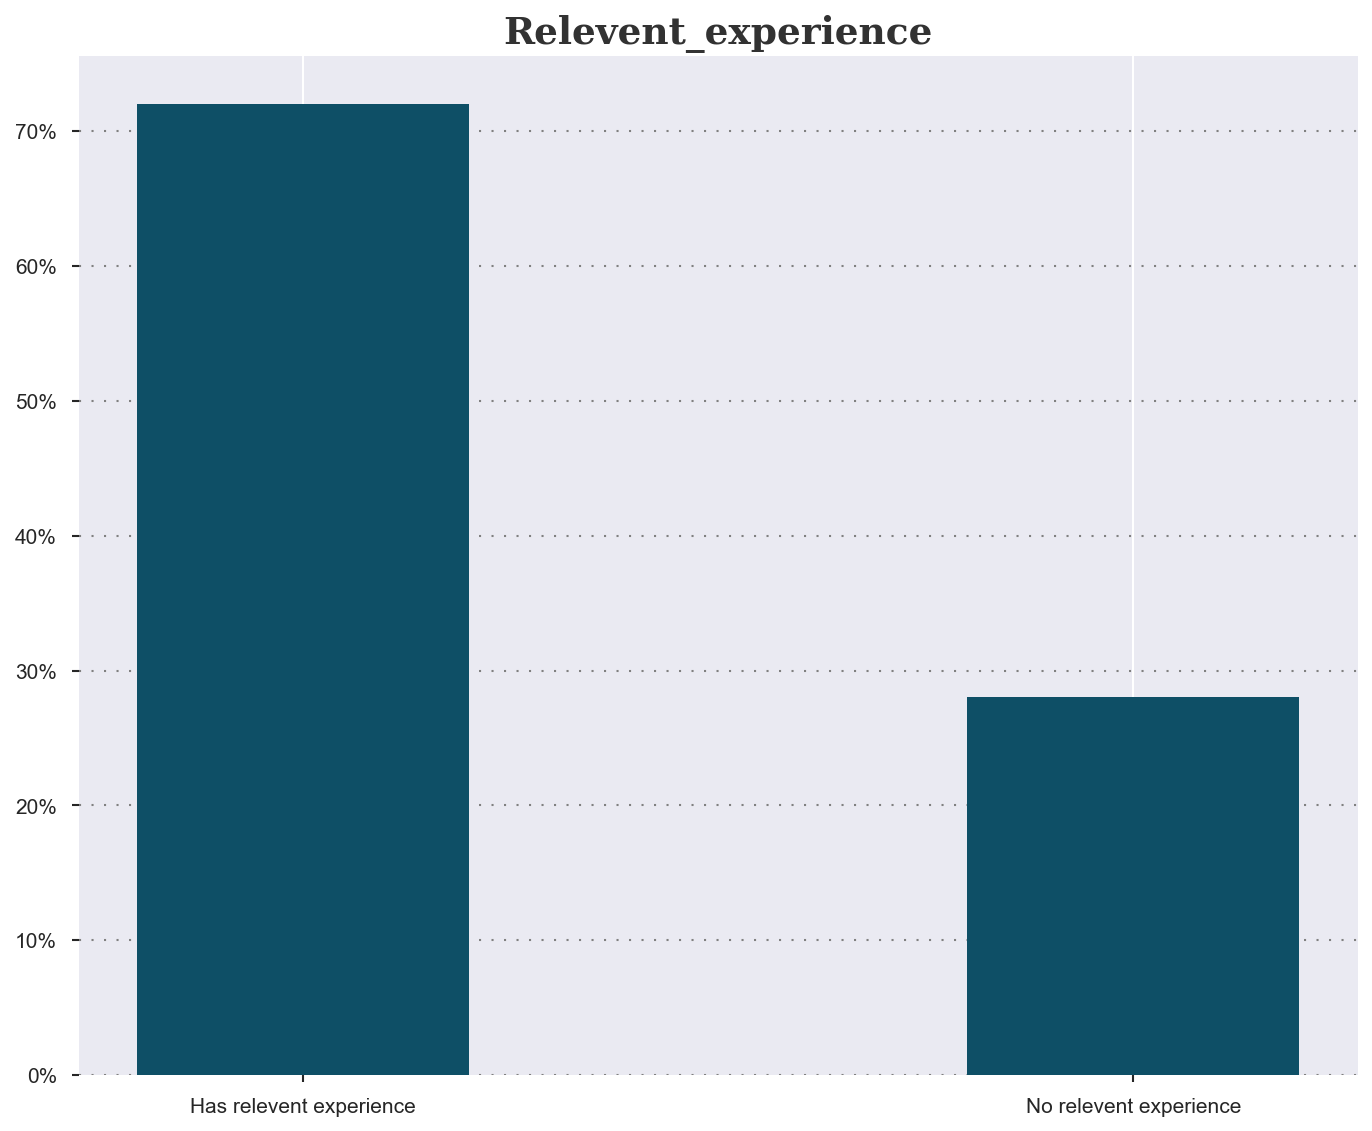

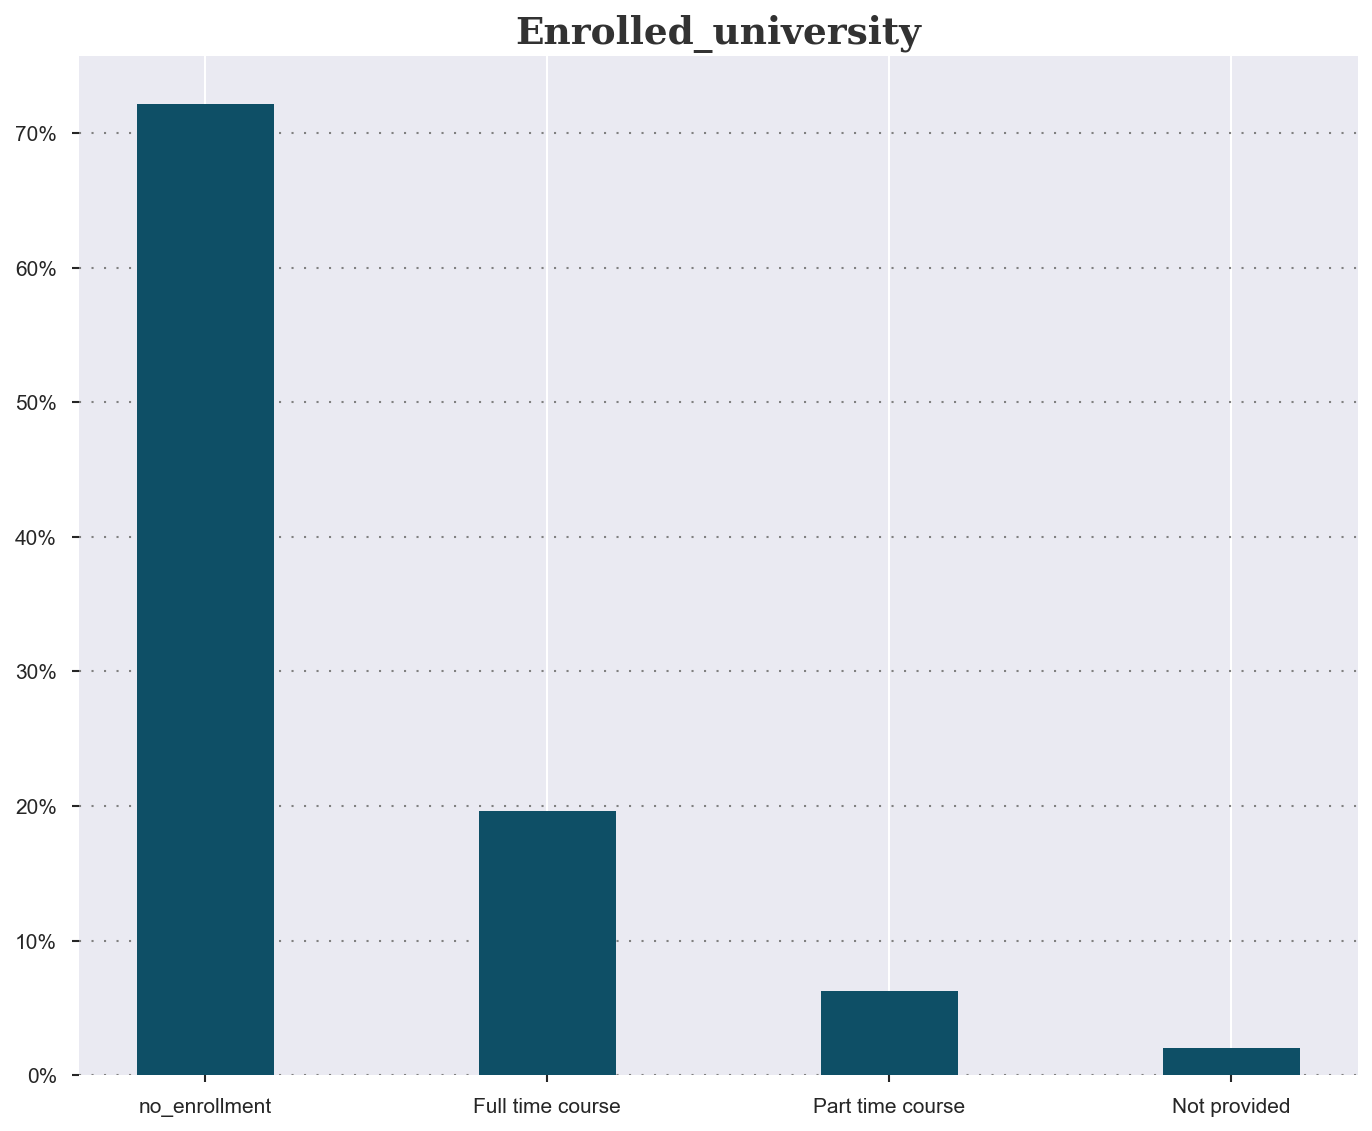

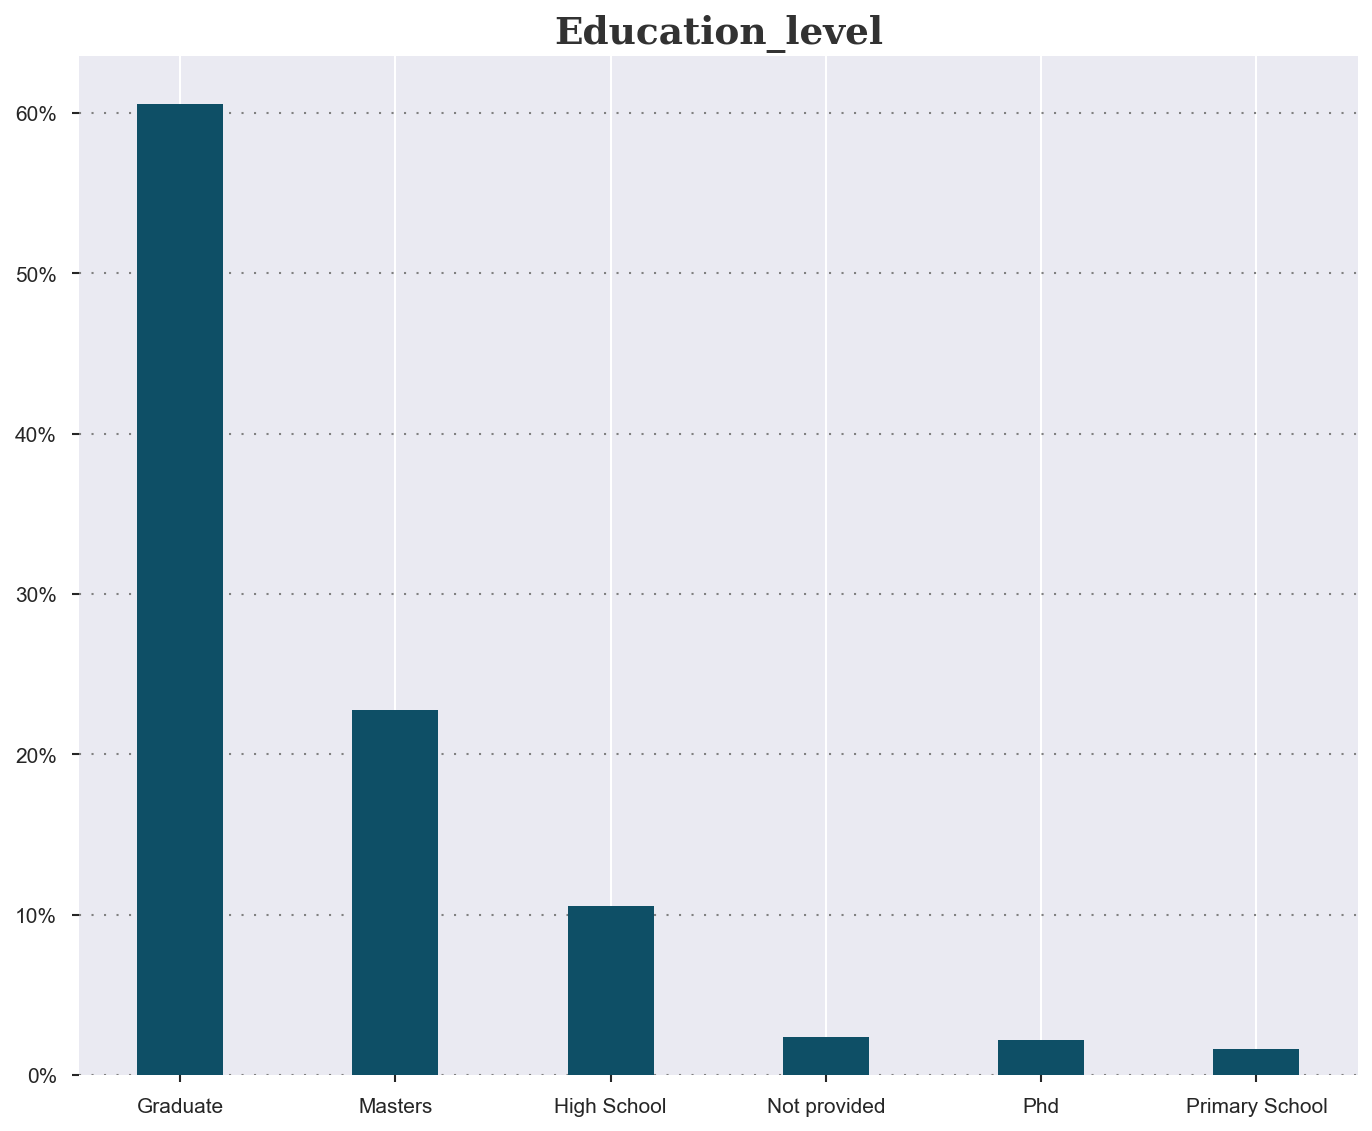

In [66]:
## Cycle through all categorical variables with low cardinality
cat_columns = aug_train.select_dtypes(include=['object']).columns.tolist()
low_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()<=5].tolist()[:-1]

for col in low_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')

    plt.bar(graph.index, graph[col], zorder=3, color='#0e4f66', width=0.4)

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    #ax.text(-0.6, 76, col.capitalize(), fontsize=28, fontweight='bold', fontfamily='serif', color="#323232")

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()
    

# Visualize Categorical Features with High Cardinality

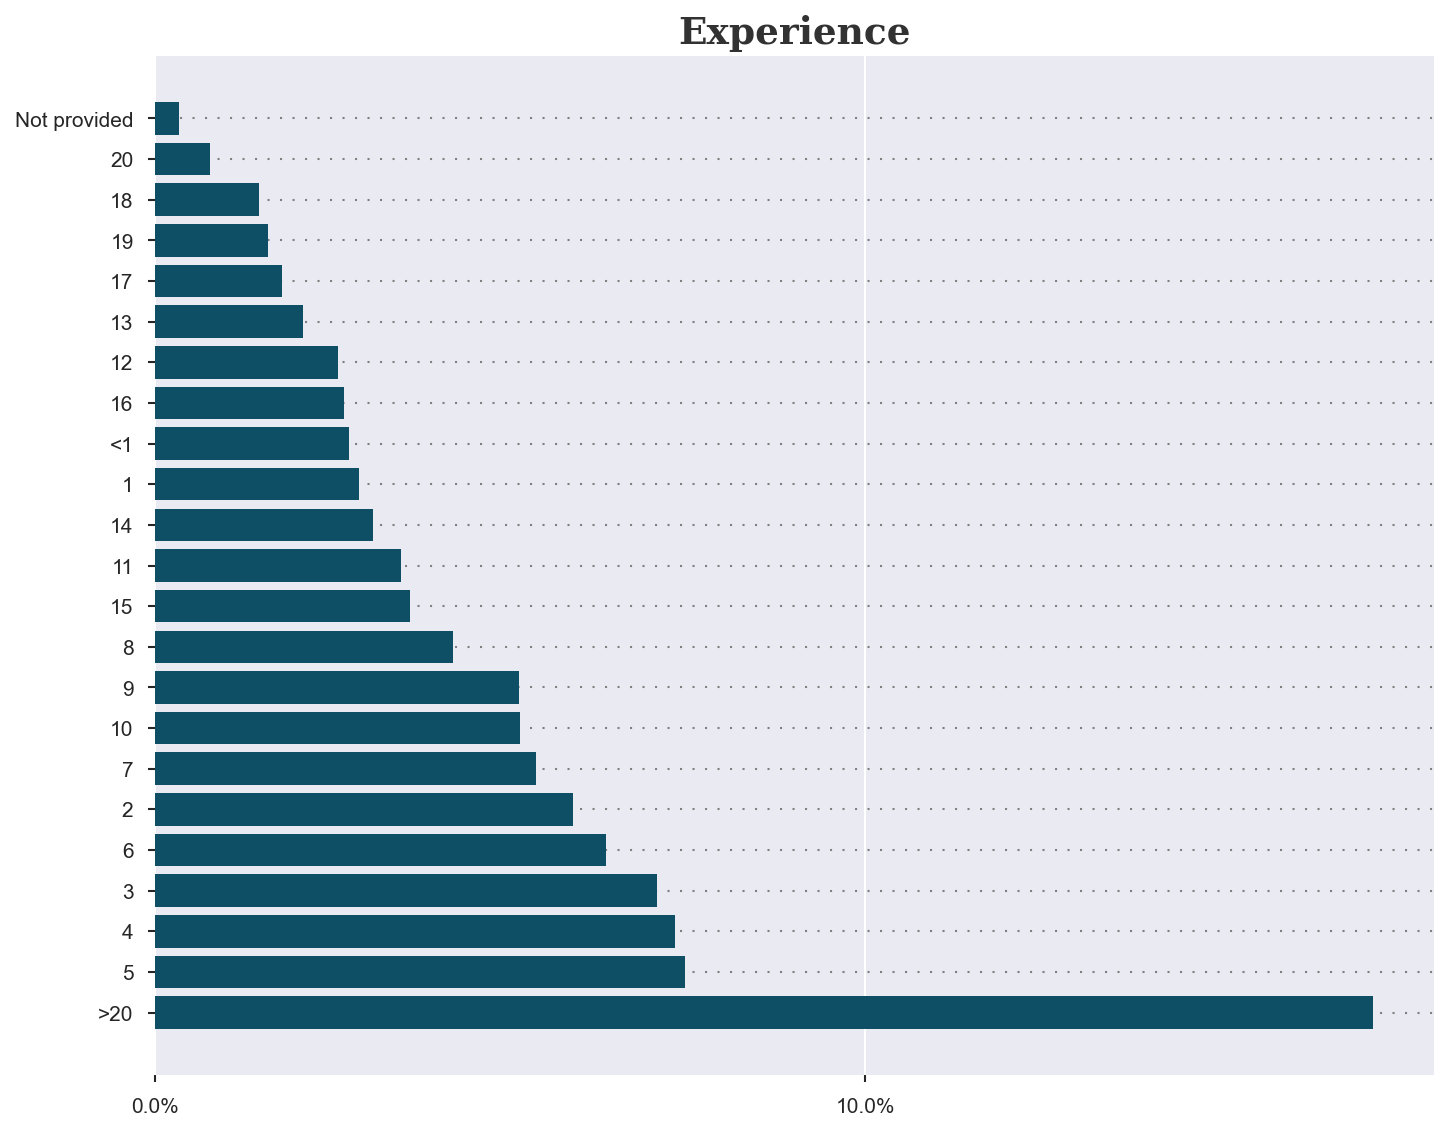

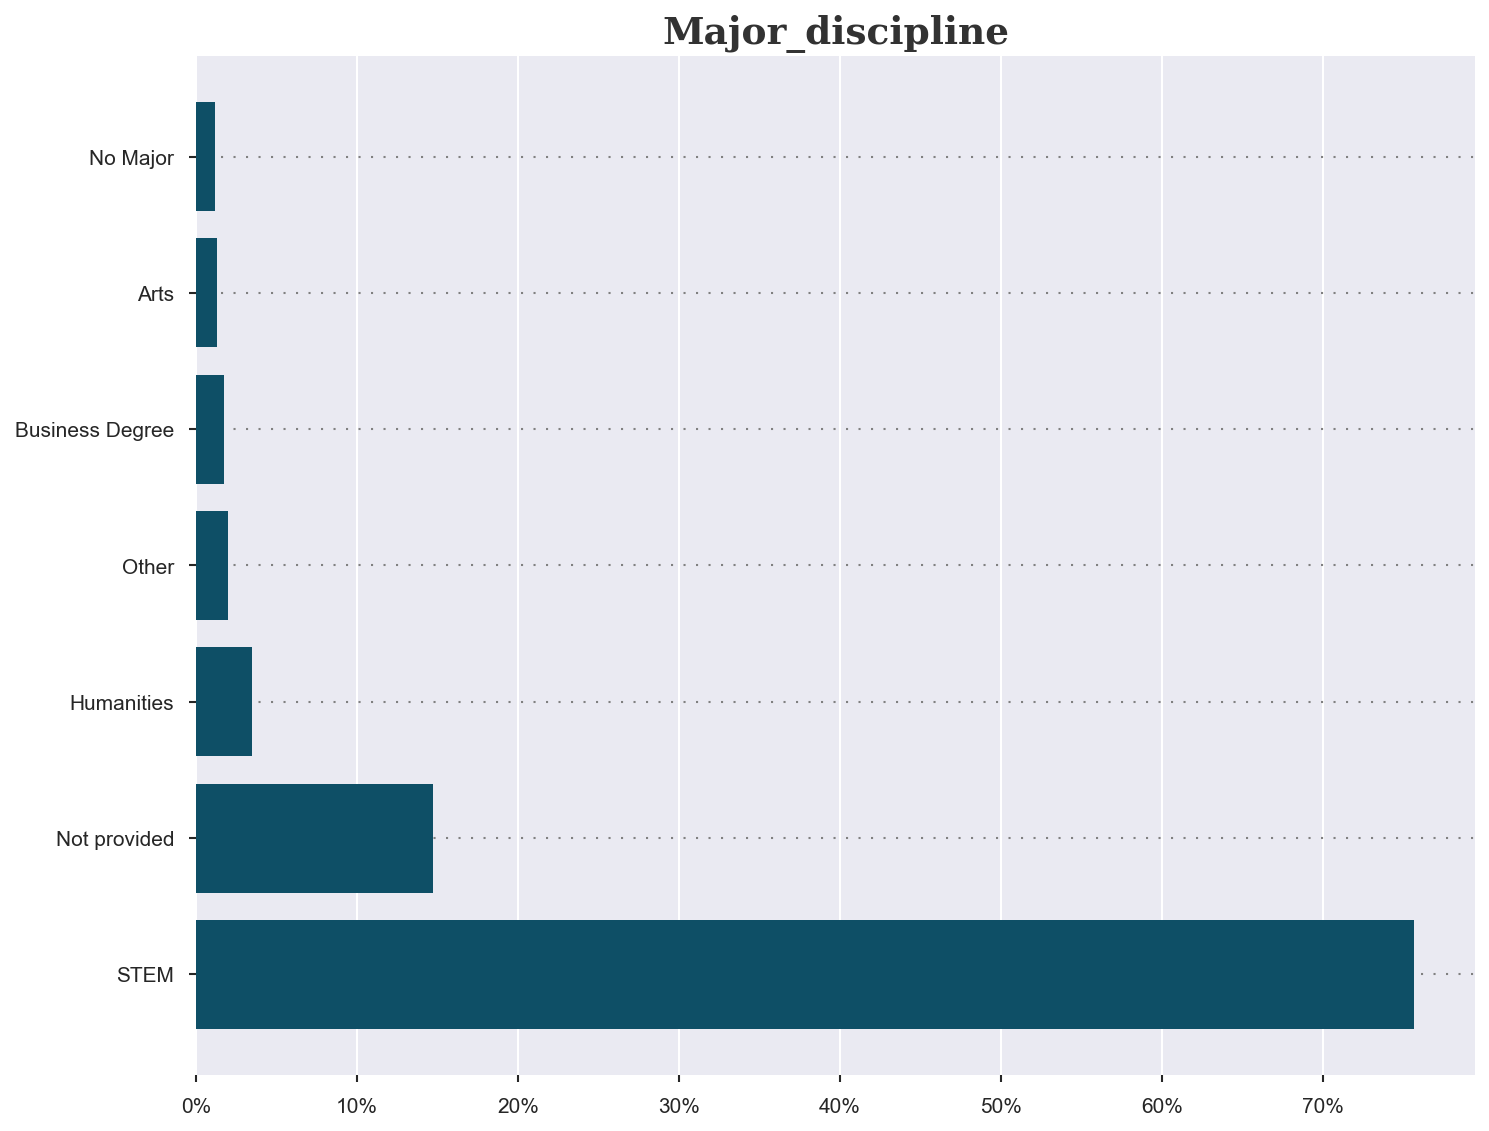

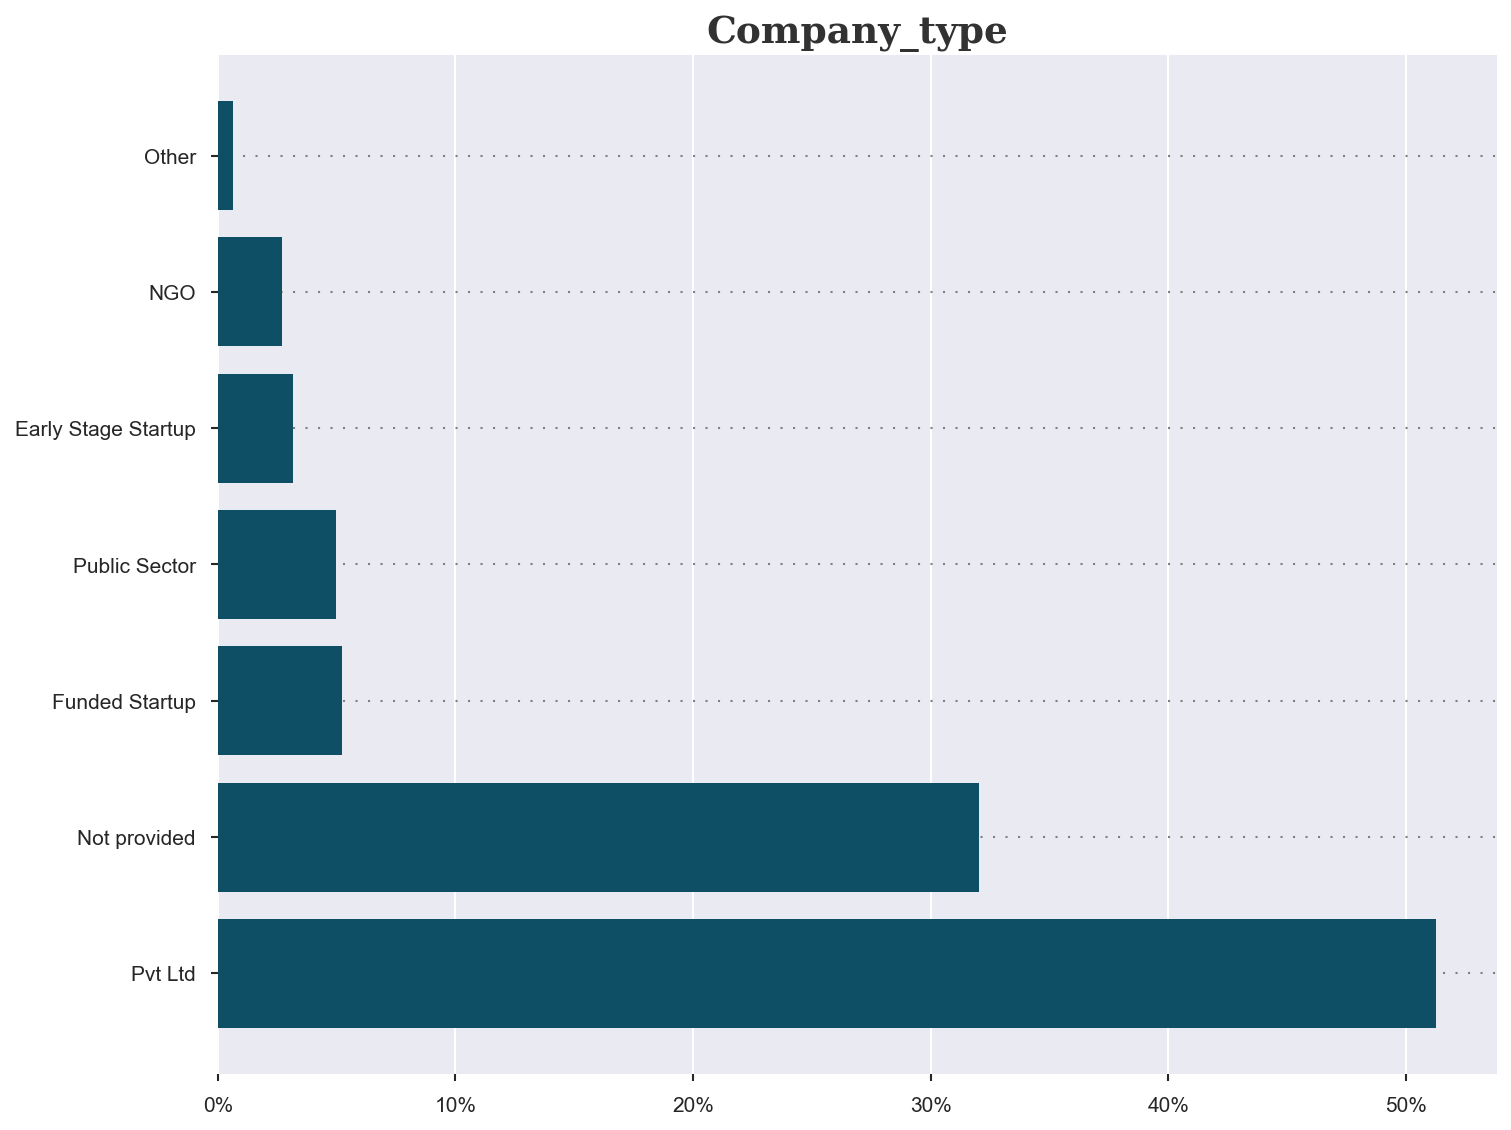

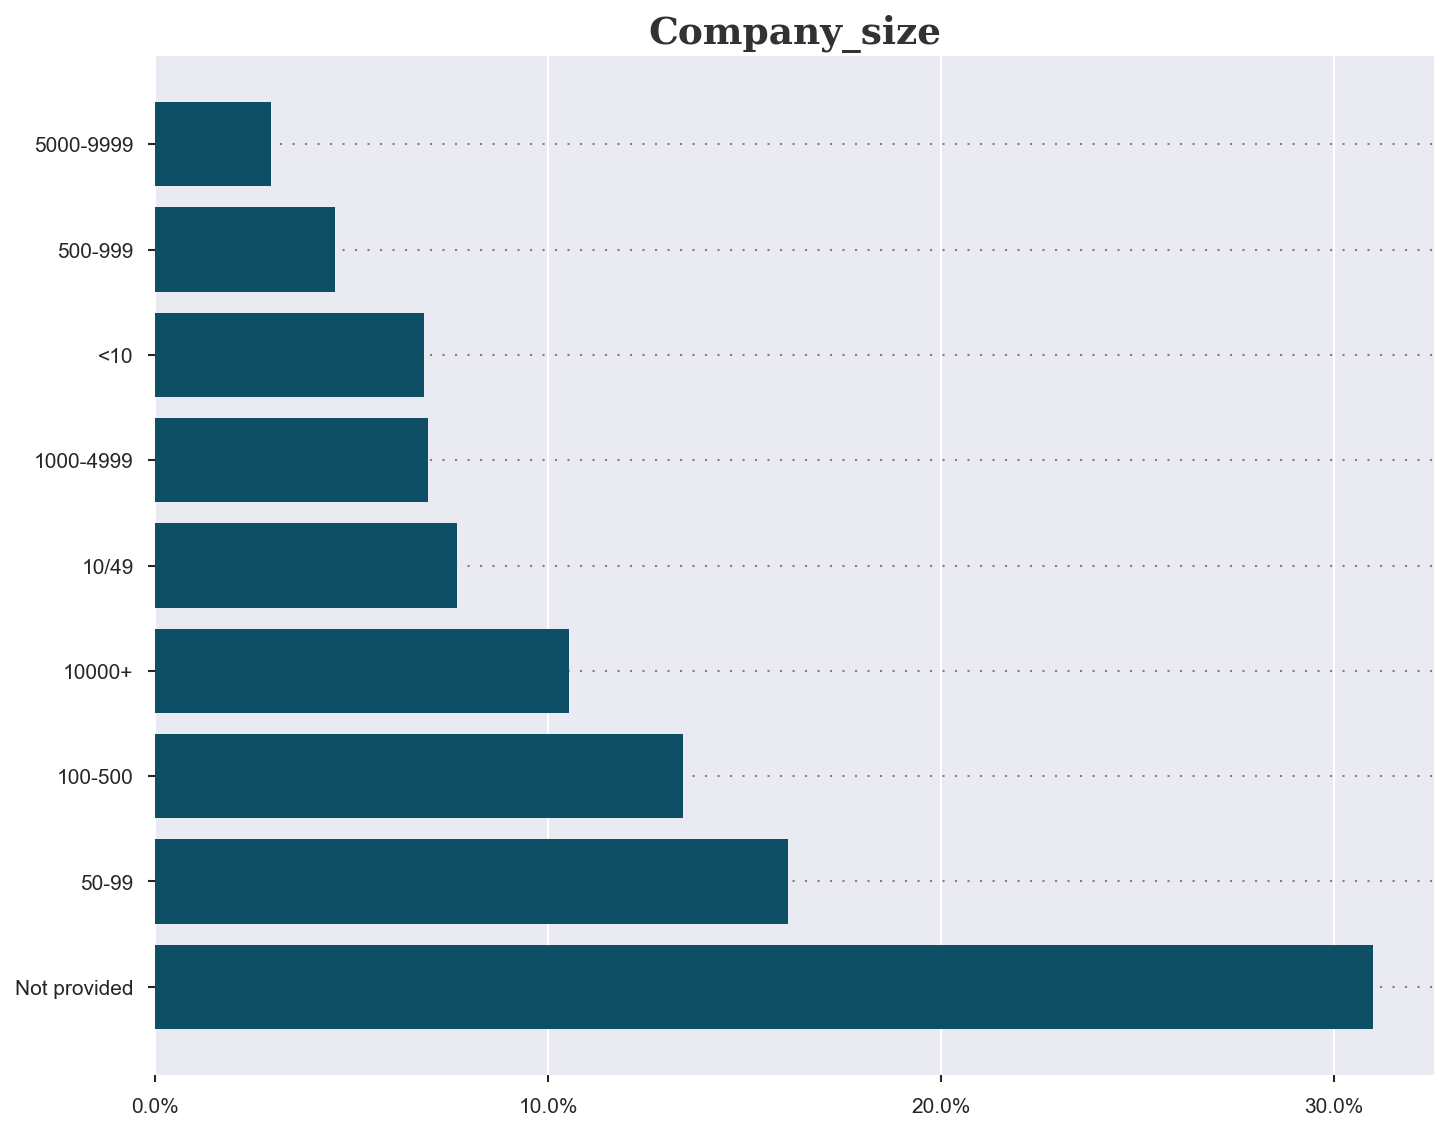

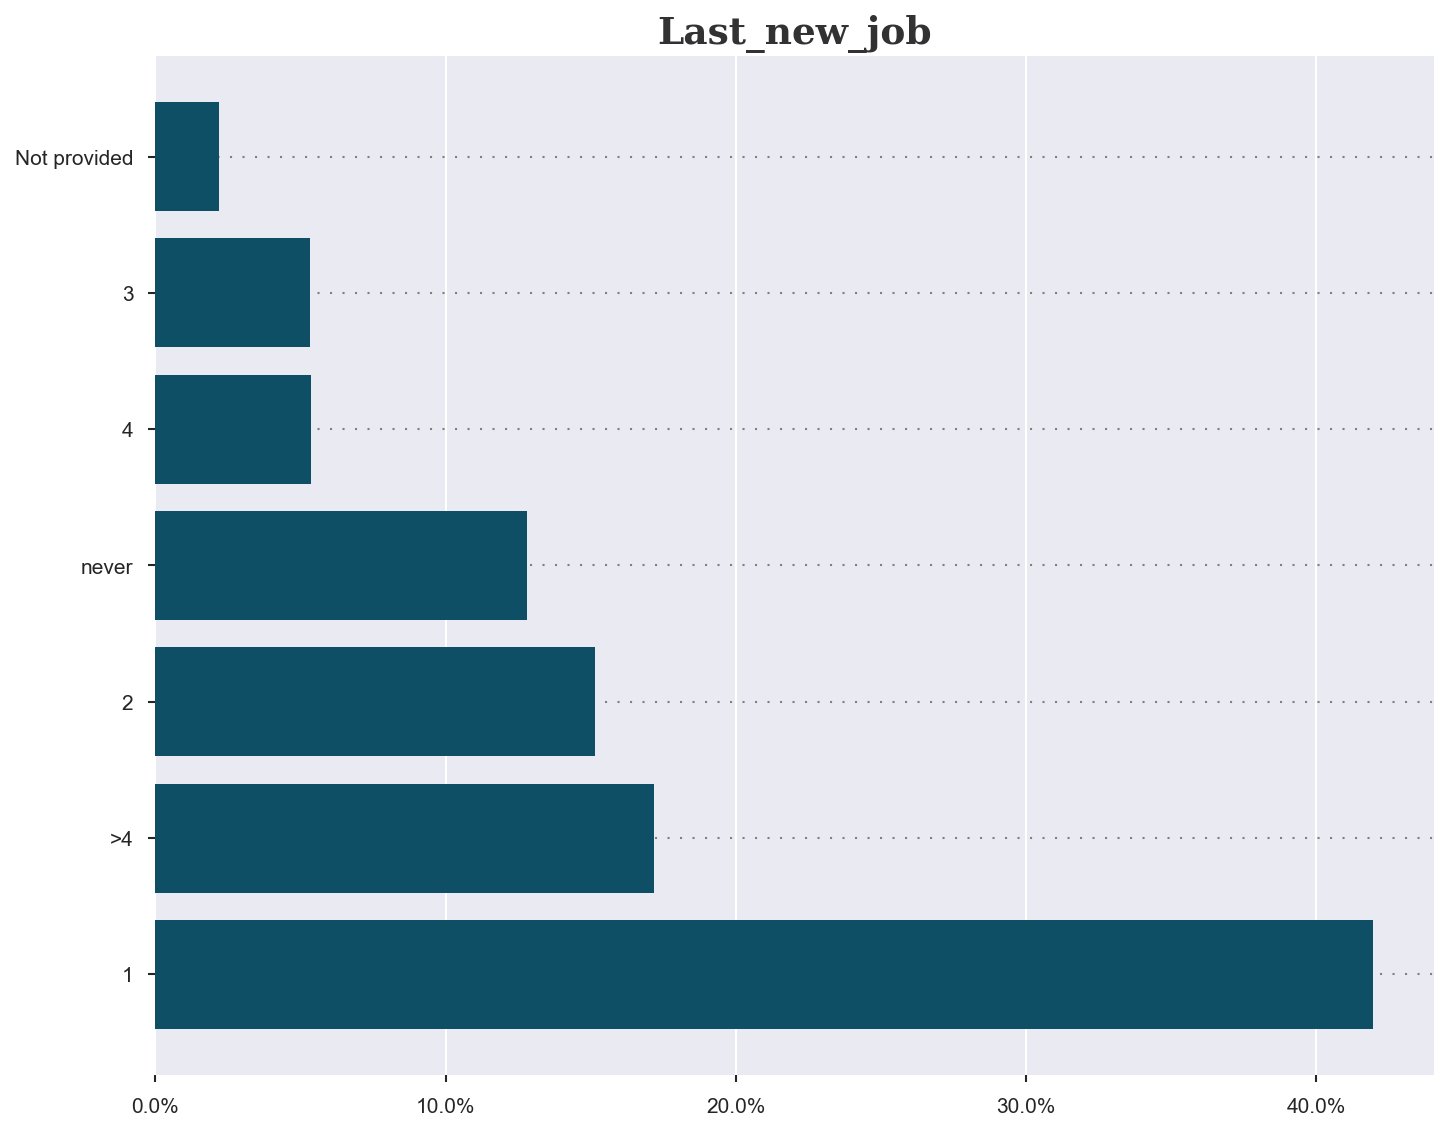

In [80]:
## Cycle through all categorical variables with low cardinality
cat_columns = aug_train.select_dtypes(include=['object']).columns.tolist()
high_cardinality_categorical_cols = aug_train.columns[aug_train.nunique()>5].tolist()

high_cardinality_categorical_cols = list(set(cat_columns) & set(high_cardinality_categorical_cols))
high_cardinality_categorical_cols.remove('city')

for col in high_cardinality_categorical_cols:
    background_color = "#fbfbfb"

    fig, ax = plt.subplots(figsize=(11,9), dpi=150)

    graph = pd.DataFrame(aug_train[col].value_counts(normalize=True, dropna = False)*100)
    graph.index = graph.index.fillna('Not provided')

    plt.barh(graph.index, graph[col], zorder=3, color='#0e4f66')

    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    #ax.text(-0.6, 76, col.capitalize(), fontsize=28, fontweight='bold', fontfamily='serif', color="#323232")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
    plt.show()

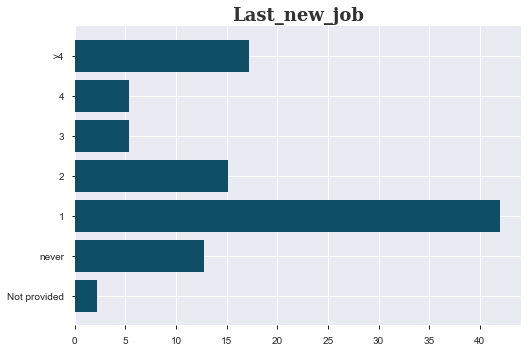

In [94]:
job_order = ['Not provided', 'never', '1', '2', '3', '4', '>4']

graph.loc[job_order]
#graph


plt.barh(graph.loc[job_order].index, graph.loc[job_order]['last_new_job'], zorder=3, color='#0e4f66')

ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

#ax.text(-0.6, 76, col.capitalize(), fontsize=28, fontweight='bold', fontfamily='serif', color="#323232")

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
    
plt.title(col.capitalize(), fontsize=18, fontweight='bold', fontfamily='serif', color="#323232")
plt.show()

# Visualize Numerical Columns

<AxesSubplot:title={'center':'City Development Index'}, xlabel='city_development_index', ylabel='Density'>

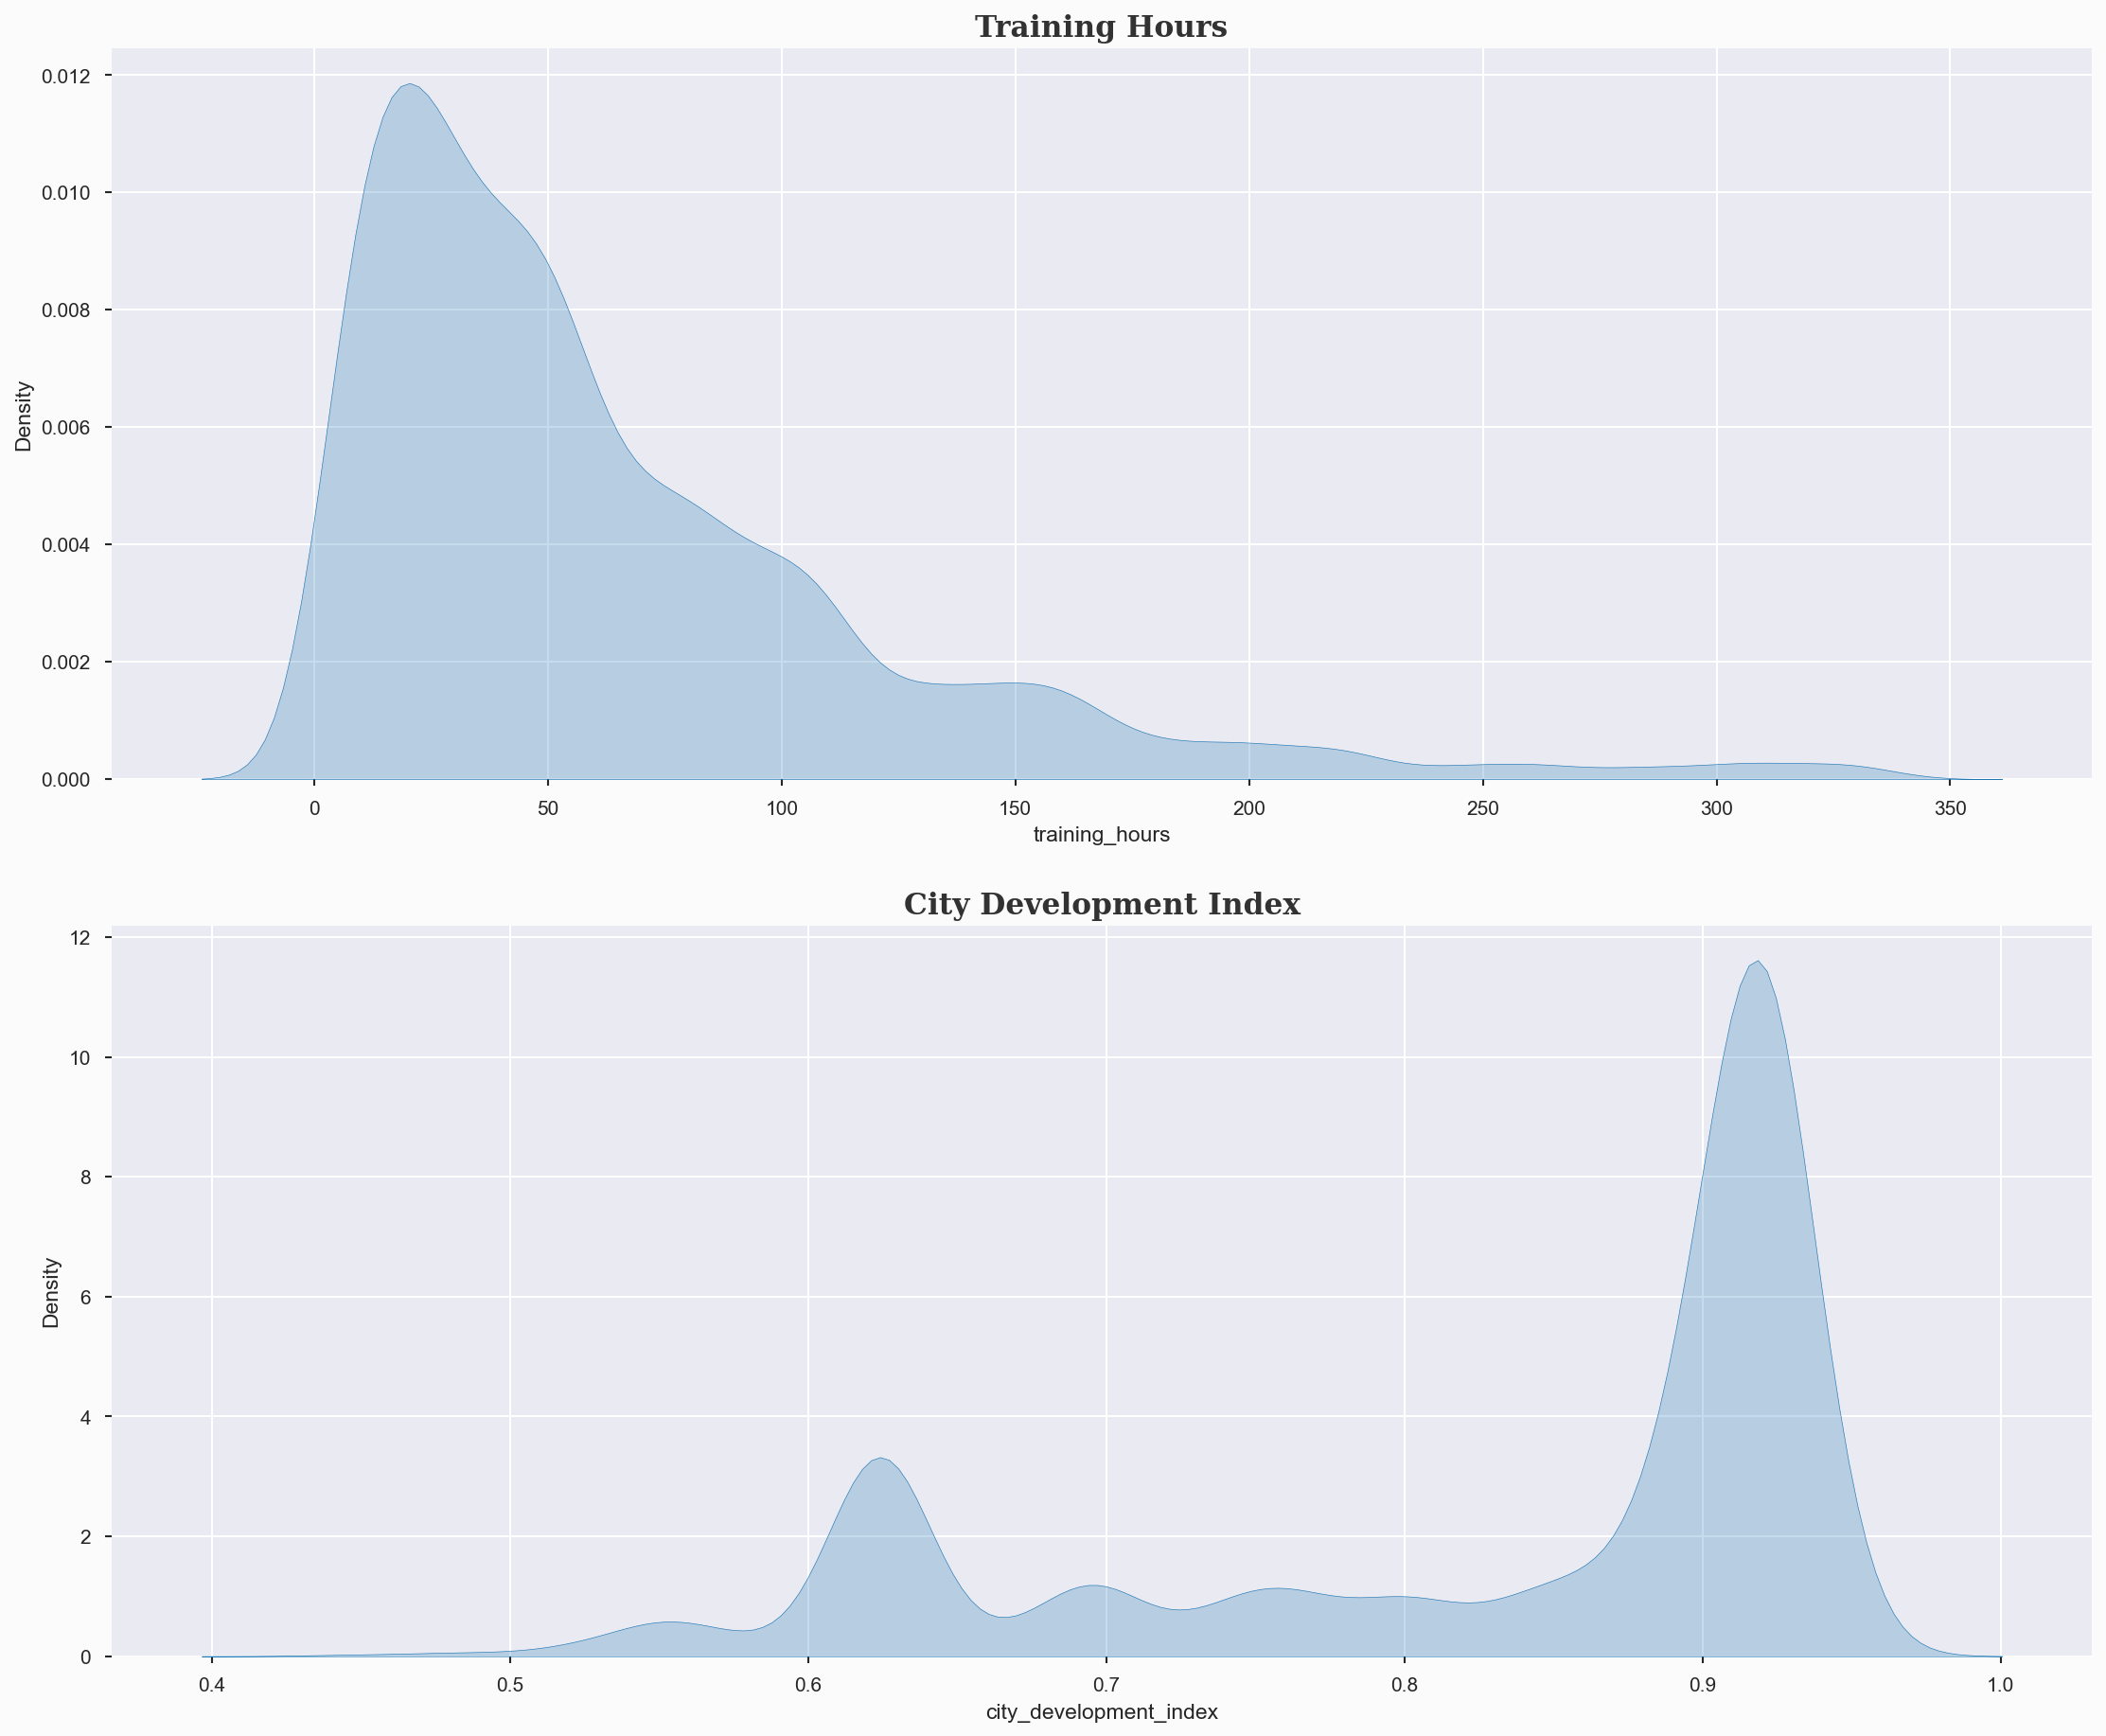

In [122]:
aug_train.select_dtypes(exclude=['object']).columns.tolist()

columns = ['city_development_index', 'training_hours']



color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax0.set_title('Training Hours', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["training_hours"], shade=True, ax = ax0, zorder = 3)

ax1.set_title('City Development Index', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["city_development_index"], shade=True, ax = ax1, zorder = 3)

# Is there a difference in distribution amongst the protected features?

In [123]:
protected_attributes = ['gender', 'city_development_index', 'experience', 'target']

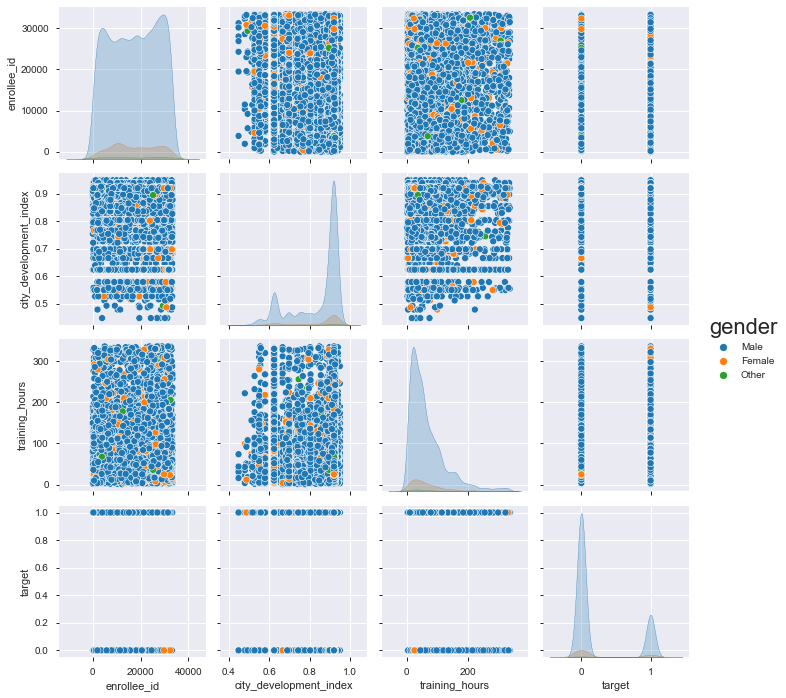

In [125]:
sns.pairplot(aug_train, hue='gender')